In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [10]:
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [11]:
df['Surname']=label_encoder.fit_transform(df['Surname'])
df['Balance']=label_encoder.fit_transform(df['Balance'])
df['EstimatedSalary']=label_encoder.fit_transform(df['EstimatedSalary'])

In [12]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [13]:
df.shape

(10000, 15)

In [14]:
df.describe()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,1507.774200,650.528800,0.545700,38.921800,5.012800,2036.788100,1.530200,0.70550,0.515100,4998.621200,0.203700,0.250900,0.247700
std,2886.89568,7.193619e+04,846.204311,96.653299,0.497932,10.487806,2.892174,2125.232536,0.581654,0.45584,0.499797,2886.711202,0.402769,0.433553,0.431698
min,1.00000,1.556570e+07,0.000000,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,1.562853e+07,773.750000,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,2498.750000,0.000000,0.000000,0.000000
50%,5000.50000,1.569074e+07,1542.000000,652.000000,1.000000,37.000000,5.000000,1383.500000,1.000000,1.00000,1.000000,4998.500000,0.000000,0.000000,0.000000
75%,7500.25000,1.575323e+07,2238.250000,718.000000,1.000000,44.000000,7.000000,3882.250000,2.000000,1.00000,1.000000,7498.250000,0.000000,1.000000,0.000000
max,10000.00000,1.581569e+07,2931.000000,850.000000,1.000000,92.000000,10.000000,6381.000000,4.000000,1.00000,1.000000,9998.000000,1.000000,1.000000,1.000000


<Axes: >

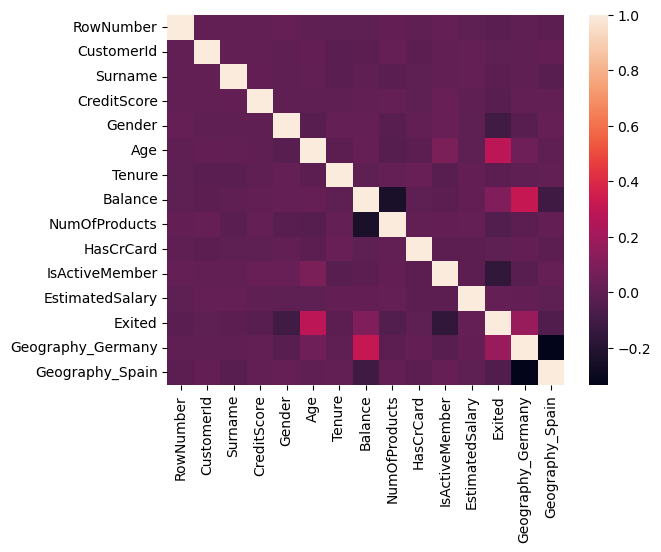

In [15]:
sns.heatmap(df.corr())

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])


In [18]:
x=df.drop(['Exited'],axis=1)
y=df['Exited']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [22]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred=model.predict(x_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8053333333333333


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



C:\Users\kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
from sklearn.metrics import accuracy_score, classification_report

In [28]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

In [29]:
print(accuracy)

0.8716666666666667


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report

In [31]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(x_train, y_train)


GradientBoostingClassifier(random_state=42)

In [32]:
y_pred = gb_model.predict(x_test)


In [33]:
# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# classification report
print(classification_report(y_test, y_pred))


Accuracy: 87.13%
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.47      0.59       584

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.76      3000
weighted avg       0.86      0.87      0.86      3000

